# Text Classification for Phishing Attack Detection Using NLP and ML

Done by:

- Udayini Vedantham (21bcs130)
- Nithish Chouti (21bcs074)

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
df.sample(5)
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)
df.sample(5)

,message_type,message
1879,spam,U have a secret admirer who is looking 2 make ...
1784,ham,"Dont search love, let love find U. Thats why i..."
3208,ham,Havent mus ask if u can 1st wat. Of meet 4 lun...
1858,ham,"Sir, i am waiting for your call."
5076,ham,"Guy, no flash me now. If you go call me, call ..."


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
df['message_type']=encoder.fit_transform(df['message_type'])
df['message_type'].sample(5)
df[df['message_type']==1]

,message_type,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [7]:
df.isnull().sum()
df.duplicated().sum()

403

In [8]:
df= df.drop_duplicates()

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

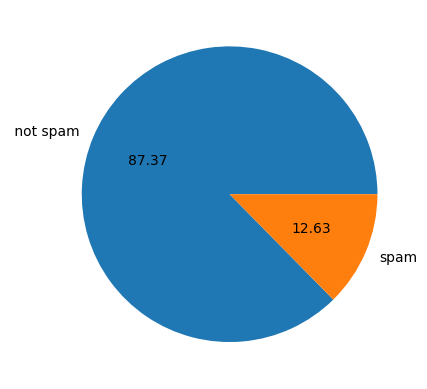

In [10]:
df['message_type'].value_counts()
plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

In [11]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
df['num_characters']=df['message'].apply(len)
df.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
from nltk.tokenize import word_tokenize
df['message'].apply(lambda x: nltk.word_tokenize(x))
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words
4601,0,\Hey j! r u feeling any better,30,8
536,0,"Probably gonna be here for a while, see you la...",63,17
3410,0,Only once then after ill obey all yours.,40,9
896,0,Hope you are having a good week. Just checking in,49,11
3452,0,Nowadays people are notixiquating the laxinorf...,274,45


In [14]:
df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [15]:
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [16]:
df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

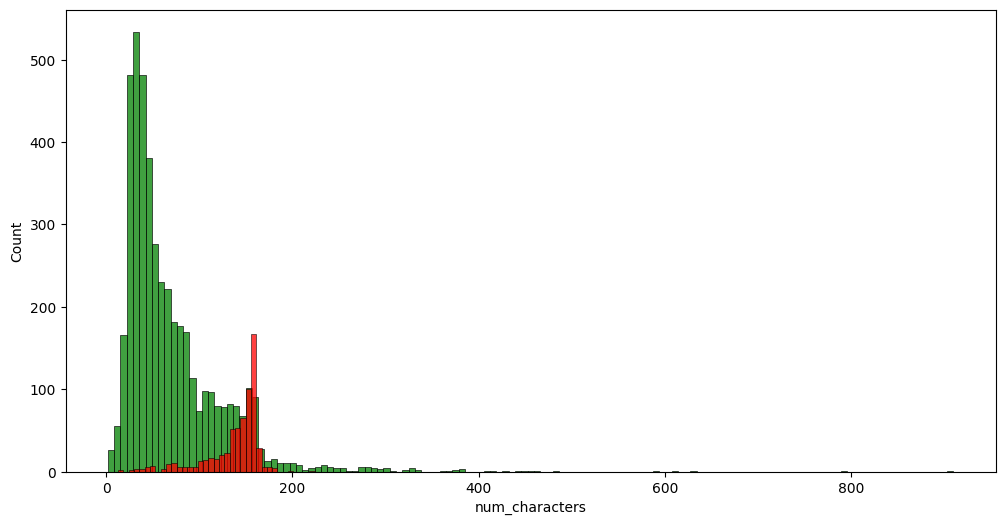

In [17]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

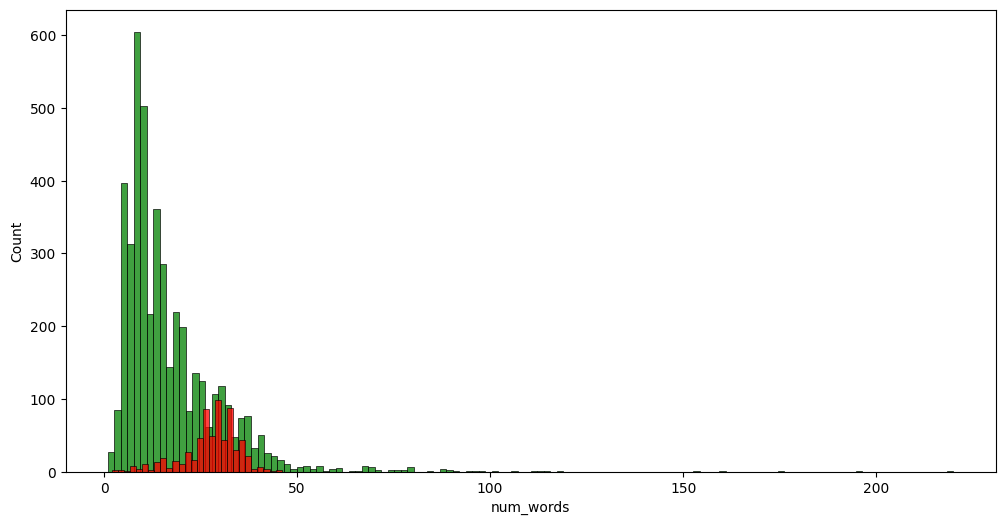

In [18]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')

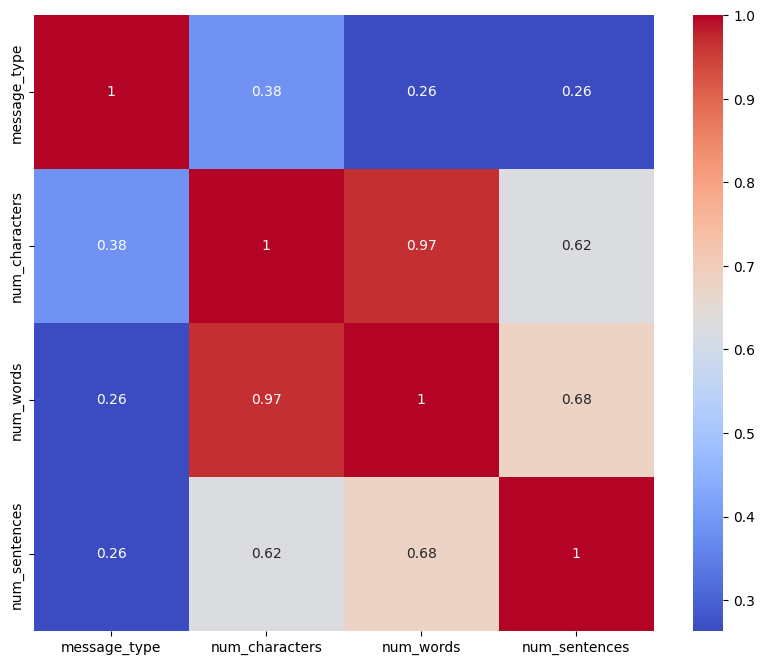

In [19]:
# sns.heatmap(df.corr(),annot=True)
# Select only the numeric columns from your DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Check if numeric_df is empty
if numeric_df.empty:
    print("No numeric columns found in the DataFrame.")
else:
    # Compute and display the heatmap if there are numeric columns
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
    plt.show()

In [20]:
# Removing stop words and punctuations
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english'))
#now for punctuation
import string
string.punctuation
# stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


 Data Preprocessing

- LowerCase

- Tokenisation

- Removing special characters

- Removing stop words and punctuation

- Stemming --lemmetization

In [21]:
def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)
    y=[]
    for i in message:
        if i.isalnum():
            y.append(i)

        y.clear()

    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()

    #now stemming function
    for i in message:
        y.append(ps.stem(i))

    #return y  --> returns as list
    return " ".join(y)

In [22]:
df['transformed_msg']=df['message'].apply(text_transform)

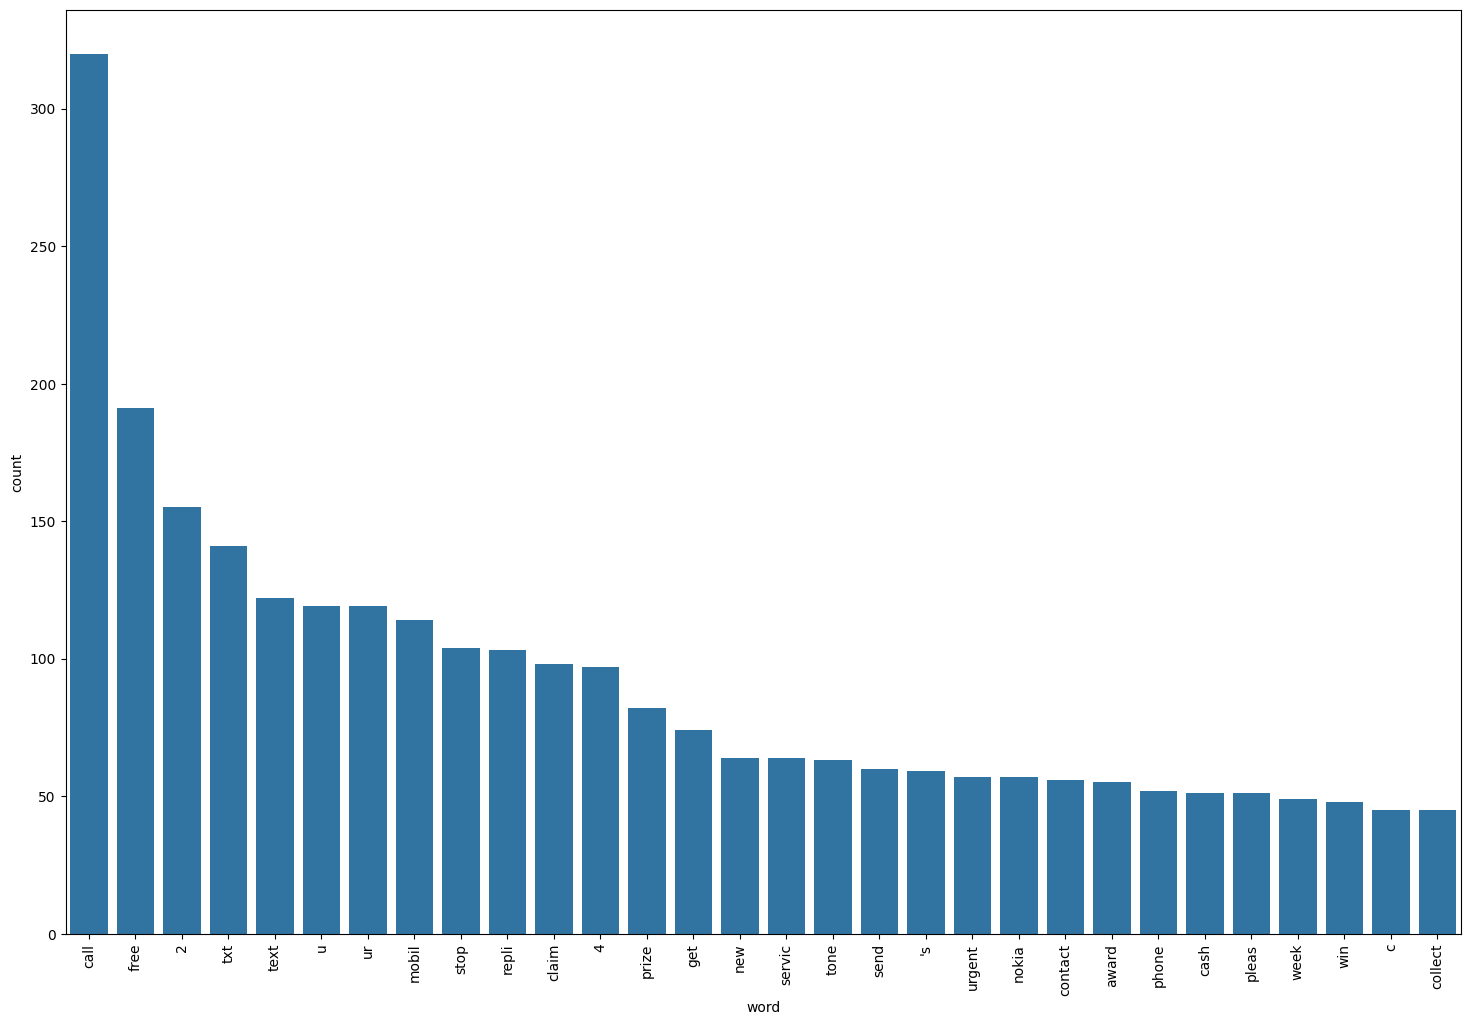

In [23]:
spam_corpus=[]
for msg in df[df['message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
from collections import Counter
# Get the 30 most common words
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30))

# Rename columns for clarity
common_words.columns = ['word', 'count']

# Plot using seaborn
plt.figure(figsize=(18, 12))
sns.barplot(x='word', y='count', data=common_words)
plt.xticks(rotation='vertical')
plt.show()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transformed_msg']).toarray()
y=df['message_type'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [25]:
gnb = GaussianNB()
mnb = MultinomialNB()

In [26]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))

Accuracy score of Gaussian NB is:  0.8781431334622823
Confusion Matrix of Guassian NB is:  [[790 106]
 [ 20 118]]
Precision score of the Gaussian NB is 0.5267857142857143


In [27]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

Accuracy score of Multinomial NB is:  0.9748549323017408
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 26 112]]
Precision score of the Multinomial NB is 1.0


In [28]:
import pickle
tfidf = TfidfVectorizer(max_features=3000)
tfidf.fit(df['transformed_msg'])
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [29]:
tfidf = pickle.load(open('vectorizer.pkl','rb'))
model = pickle.load(open('model.pkl','rb'))

In [30]:
import string
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [31]:
test_text = "This is a test message."
vector_input = tfidf.transform([test_text])

In [35]:
input_sms = """Subject: Urgent: Your Account Needs Immediate Attention

Dear User,

We have noticed some unusual activity on your account and need to verify your identity to prevent any potential security threats. To ensure the safety of your account, please click the link below and follow the instructions:

[Verify your account now]

Failure to complete this verification within the next 24 hours will result in your account being temporarily suspended for your protection.

If you did not initiate this activity, please contact our support team immediately.

Thank you for your cooperation.

Sincerely,
The Support Team"""

transformed_sms = transform_text(input_sms)
# 2. vectorize
vector_input = tfidf.transform([transformed_sms])
# 3. predict
result = model.predict(vector_input)[0]
# 4. Display
if result == 1:
    print("Spam")
else:
    print("Not Spam")


Spam


In [36]:
input_sms = """Dear Sir,

I hope this message finds you well. I am Udayini Vedantham, 4th year CSE and am reaching out to request a letter of recommendation from you as I prepare my applications for Master’s programs in Computer Science in the United States for the Fall 2025 intake.

I have the privilege of working under your guidance for the course on Information Retrieval and its project Information retrieval from Text and Images along with the 7th Sem Mini Project Question Generation using Generative AI Project. I believe your recommendation would add great value to my application since most of my research interests and projects align with ML, DL and NLP. It would also provide valuable insights into my skills, dedication, and academic performance.

I would be happy to provide any additional information or meet at your convenience to discuss this further. Additionally, I can share details about the universities and programs I am applying to if that would be helpful.

Thank you very much for your consideration sir

Udayini Vedantham,
21BCS130"""
transformed_sms = transform_text(input_sms)
# 2. vectorize
vector_input = tfidf.transform([transformed_sms])
# 3. predict
result = model.predict(vector_input)[0]
# 4. Display
if result == 1:
    print("Spam")
else:
    print("Not Spam")


Not Spam
